In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
import uncertainties as unc
import uncertainties.unumpy as unp

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')
labelsize = 20
font = {
	'family': 'serif',
	'size': 20,
	'style': 'normal',
	'weight': 'medium',
	'fontname': 'Arial'
}

In [4]:
dSph = input("Insert the name of the dSph from this list: 1. Fornax\n\n ")

Insert the name of the dSph from this list: 1. Fornax

 Draco


In [4]:
txt = "%s_dSph"%(dSph)
isDir = os.path.isdir(txt)
if isDir:
    txt = "rm -rf %s_dSph"%(dSph)
    os.system(txt)

In [5]:
print("\
Collecting data + applying selections using GetGaia code\
(arXiv:2011.02627 [astroph.GA] & arXiv:2104.00662 [astro-ph.GA])")
txt = 'python3 GetGaia/getgaia.py --name "%s dSph" --silent True'%(dSph)
os.system(txt)

Object found:    MAIN_ID   
-------------
NAME Dra dSph


************ USED PARAMETERS *************
- (ra, dec) = (260.05973, 57.92122) deg.
- (pmra, pmdec) = (0.329, 0.172) mas/yr
- pmra max min = [-4.671, 5.329] m.a.s./yr.
- pmdec max min = [-4.828, 5.172] m.a.s./yr.
- parallax = [-2.0, 1.0] m.a.s.
- radius = 1.06 deg.
******************************************

Successfully created the directory Draco_dSph 
Successfully created the directory Draco_dSph/individual_queries 
INFO: Query finished. [astroquery.utils.tap.core]
Removed jobs: '['1651722784624O']'.


----------------------------
Table 1 of 1: 9930 stars
----------------------------
INFO: Gaia TAP server logout OK [astroquery.gaia.core]
INFO: Gaia data server logout OK [astroquery.gaia.core]
table is: 
                source_id  ...  phot_rp_n_contaminated_transits
0     1420739000712716160  ...                                0
1     1420739000712716672  ...                                0
2     1420739172511410176  ...    

0

In [6]:
print("Done with GetGaia. Moving the collected information for analysis ...")
txt = "cp %s_dSph/%s_dSph.csv AnalyzeGaia/"%(dSph,dSph)
os.system(txt)

Done with GetGaia. Moving the collected information for analysis ...


0

## Calculate the velocities and coordinates in the co-moving frame

In [5]:
os.chdir("AnalyzeGaia")

In [6]:
from Preprocess import Preprocess

Insert the distance of the Galaxy from the earth in kilo-parsecs  (for example use table 1 of arXiv:0908.2995 [astro-ph.CO]) For example: use 147 for Fornax

 76
Insert the error of the distance of the Galaxy from the earth in kilo-parsecs  (for example use table 1 of arXiv:0908.2995 [astro-ph.CO]). For example: use 3 for Fornax

 5
Plotting the histograms of the co-moving frame ...


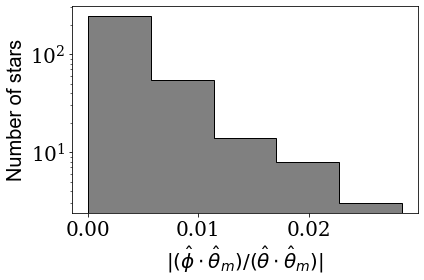

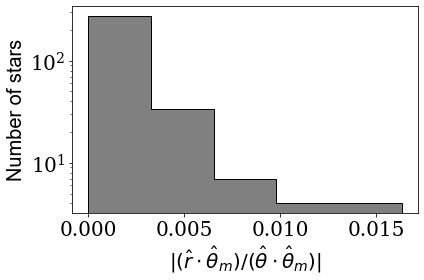

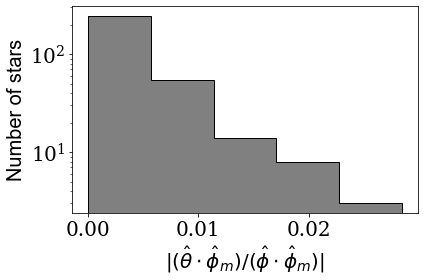

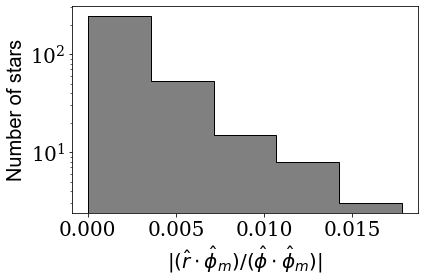

Saved the plots in the local directory.
Computing x and y of stars and their errors ...
Computing the velocites of the stars and their errors ...
Output file Data.csv stored in the local directory!


In [7]:
Preprocess(dSph)

In [8]:
txt = "mv Data.csv %s_Data.csv"%(dSph)
os.system(txt)

0

## Compute the mass density of dark matter and its error

#############
data summary:
            x (pc)       x_err       y (pc)       y_err    vx (pc/yr)  \
count   325.000000  325.000000   325.000000  325.000000  3.250000e+02   
mean     -1.009507  231.913577     0.092240  122.314082  1.284863e-18   
std     236.397605  131.257282   310.697428   68.275990  7.658823e-05   
min   -1240.807972   50.357644 -1352.548590   27.257786 -2.535022e-04   
25%     -79.210900  124.994796  -125.663351   65.316320 -4.235503e-05   
50%       1.826475  194.750712     5.437519  106.082531  1.199498e-05   
75%      81.101965  323.883984   130.122341  170.551640  5.050793e-05   
max    1078.722006  610.352705  1307.285608  309.151694  1.594520e-04   

           vx_err    vy (pc/yr)      vy_err  
count  325.000000  3.250000e+02  325.000000  
mean     0.000096 -3.841412e-18    0.000084  
std      0.000056  6.965240e-05    0.000048  
min      0.000019 -1.273561e-04    0.000018  
25%      0.000050 -4.530935e-05    0.000045  
50%      0.000081 -1.227501e-05    0.0

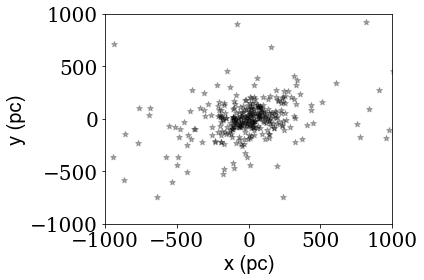

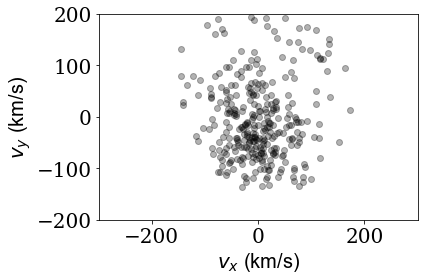



Plotting the histograms of the positions and velocities of the stars:


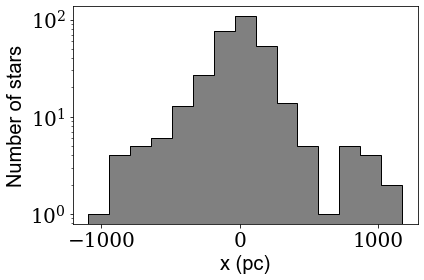

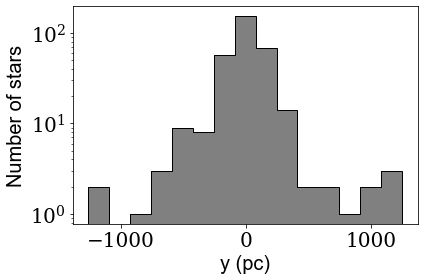

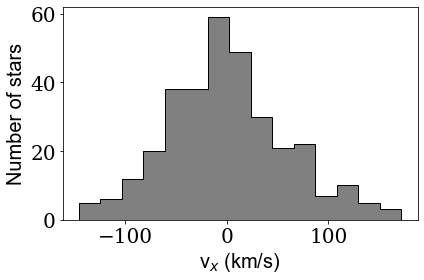

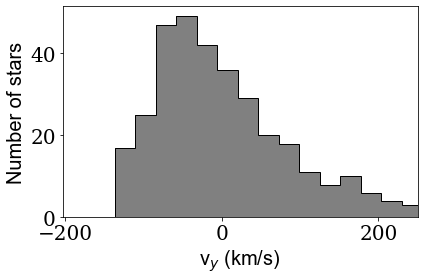



Estimating the phase-space density:
{'bandwidth': 0.17673469387755103}
resolution: 222.331 (pc) 45.2187 (km/s)


Estimate dark matter mass density at x = ? (pc)
200


Estimate dark matter mass density at y = ? (pc)
200


Working on DM mass density estimation:  
time: 4.75008
Finished computations at (x,y). Working on their errors ...
0
iEns: 0
0.0
0.0
0.0
iEns: 1
5444.910273176516
786.7522065164303
60.681527778673626
iEns: 2
6204.286906324516
881.7771364048235
785.44771384156
iEns: 3
6126.96776095486
846.6165502884375
1303.9803756945946
iEns: 4
7722.794734921409
1082.613951110406
1202.9953818680422
iEns: 5
7076.485867363435
1000.1076527045424
1100.5097316940492
iEns: 6
7185.625388826895
1027.8116584204672
1319.7149818601924
iEns: 7
6937.997316794253
962.662718232103
1349.0140935359664
iEns: 8
6887.905948525405
1022.4217302712938
1338.316700259653
iEns: 9
8100.276707102456
1003.8983596538603
2184.816384300156


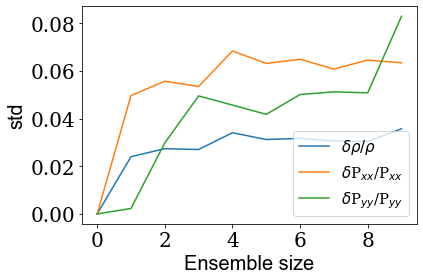

drho/rho=> systematic: 0.0703473 statistic: 0.0357637
dPxx/Pxx=> systematic: 0.2216 statistic: 0.0634481
dPyy/Pyy=> systematic: 0.219597 statistic: 0.083021
Working on estimations at x+dx ...
time: 4.8752
Working on estimations at y+dy ...
time: 5.01526
Working on estimations at x+2dx ...
time: 4.96811
Working on estimations at y+2dy ...
time: 4.98599
Using the finite difference method to estimate the derivatives ...
dx_rho: (-6.4+/-0.4)e+05 
dy_rho: (-7.7+/-0.5)e+05
dx_Pxx: (-4.5+/-1.0)e+04 
dy_Pyy: (-9.1+/-1.9)e+04
dxx_Pxx: (-1.8+/-0.4)e+05 
dyy_Pyy: (-3.5+/-0.6)e+05
DM rho: (3.5+/-0.7)e-19 (kg/m^3)


In [9]:
from EstimateDM import EstimateDM
EstimateDM(dSph)